In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import Counter
from scipy import stats
import random

In [2]:
data_path = '../../data/tag_novelty_full/'

In [6]:
fandom_list = [n for n in os.listdir(data_path) if '.tsv' in n]

In [19]:
fandom_list

['tolkien_j_r_r_works_&_related_fandoms_tag_novelty_conlen_full.tsv',
 'star_wars_all_media_types_tag_novelty_conlen_full.tsv',
 'the_avengers_all_media_types_tag_novelty_conlen_full.tsv',
 'kuroko_no_basuke_tag_novelty_conlen_full.tsv',
 'doctor_who_&_related_fandoms_tag_novelty_conlen_full.tsv',
 'hamilton_miranda_tag_novelty_conlen_full.tsv',
 'dragon_age_all_media_types_tag_novelty_conlen_full.tsv',
 'buffy_the_vampire_slayer_tag_novelty_conlen_full.tsv',
 'shakespare_william_works_tag_novelty_conlen_full.tsv',
 'les_miserables_all_media_types_tag_novelty_conlen_full.tsv',
 'sherlock_holmes_&_related_fandoms_tag_novelty_conlen_full.tsv',
 'one_direction_tag_novelty_conlen_full.tsv',
 'haikyuu_tag_novelty_conlen_full.tsv',
 'ms_paint_adventures_tag_novelty_conlen_full.tsv',
 'hetalia_axis_powers_tag_novelty_conlen_full.tsv',
 'the_walking_dead_&_related_fandoms_tag_novelty_conlen_full.tsv',
 'bishoujo_senshi_sailor_moon_tag_novelty_conlen_full.tsv',
 'dcu_tag_novelty_conlen_full.tsv

In [8]:
df = pd.read_csv(os.path.join(data_path, fandom_list[0]), sep = '\t')

In [9]:
df.columns.values

array(['AdditionalTags', 'ArchiveWarnings', 'Author', 'Bookmarks',
       'Category', 'ChapterIndex', 'Chapters', 'Characters', 'Comments',
       'CompleteDate', 'Fandoms', 'Hits', 'Kudos', 'Language', 'Notes',
       'PublishDate', 'Rating', 'Relationship', 'Summary', 'Title', 'URL',
       'UpdateDate', 'Words', 'tag_novelty'], dtype=object)

In [10]:
df.head().AdditionalTags.tolist()

['Bunniverse',
 'Incest, Jealousy, Kissing, Frottage, curvo is possessive, tyelko is jealous',
 'Elves and Dwarves, Friendship, Dwarf Culture & Customs, Stars, Gen or Pre-Slash, Religion',
 'Post-Battle of Bywater, Reunions, Established Relationship',
 'First Kiss, Fluff, Drinking wine by the fire']

In [11]:
df = df.dropna(subset=['Kudos', 'tag_novelty'])
stats.pearsonr(df['Kudos'], df['tag_novelty'])

(0.09775794143131243, 1.0040654344101681e-54)

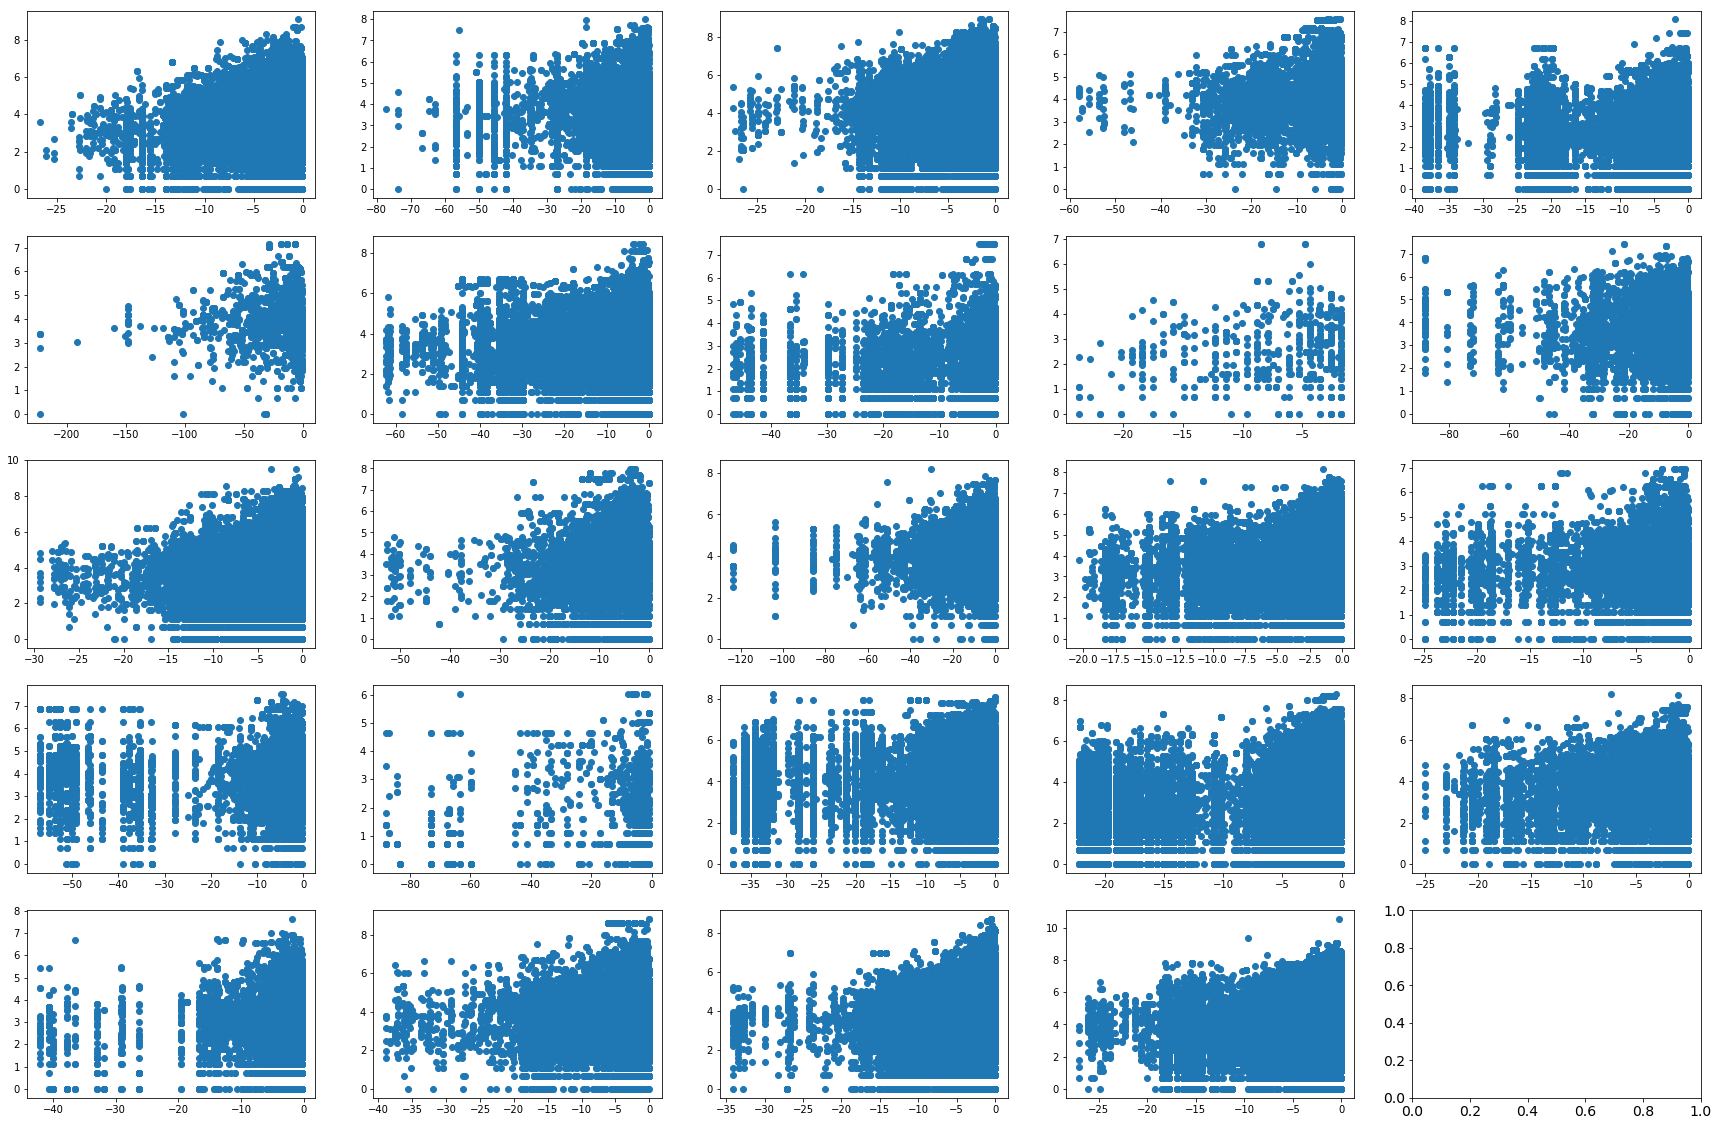

In [12]:
fig, axs = plt.subplots(5,5, figsize=(30, 20))
axs = axs.ravel()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams.update({'axes.titlesize': 'large'})

for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path, fandom), sep = '\t')

#         axs[i].errorbar(x, y, yerr=asymmetric_error,fmt='o')
    axs[i].scatter(df['tag_novelty']*1000, np.log(df['Kudos']))
#         title = fandom.replace('_temporal_cos_toprev.tsv', '').replace('all_media_types', '')\
#         .replace("&_related_fandoms", '').replace("_", ' ').capitalize().replace('Dcu', 'DCU')
#         axs[i].set_title(title, fontsize = 20)
#         axs[i].set_xlim([min(x) -1, max(x) + 1])
#         axs[i].set_ylim([min(y) -0.2, max(y) + 0.2])
#         for tick in axs[i].xaxis.get_major_ticks():
#             tick.label.set_fontsize(16) 
#         for tick in axs[i].yaxis.get_major_ticks():
#             tick.label.set_fontsize(16)

#         fig.text(0.5, 0.06, 'Cosine distance', ha='center', va='center', fontsize=25)
#         fig.text(0.08, 0.5, 'Log Kudos', ha='center', va='center', rotation='vertical',fontsize=25)

#     plt.savefig('cos_log_kudos_toprev.pdf', format = 'pdf')


In [13]:
def bootstrap_resample(li):
    if len(li) > 0:
        ave_original = np.average(li)
        aves = []
        for i in range(1000):
            sample = []
            for i in range(len(li)):
                sample.append(random.choice(li))
            aves.append(np.average(sample))
        tail = sorted(aves)[24]
        head = sorted(aves)[975]
        return (ave_original, tail, head)

In [14]:
def create_dict(fandom, field, binsize):
    
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t', error_bad_lines=False)
    df = df.dropna(subset = [field])
    df['Kudos'] = np.log(df['Kudos'])
    df.tag_novelty = df.tag_novelty * 1000
    # Make bins
    df.tag_novelty = df.tag_novelty.astype(float)
    min_n = min(df.tag_novelty.tolist()) - 0.1
    max_n = max(df.tag_novelty.tolist()) + 0.1
    dic = {}
    for i in np.arange(min_n, max_n, binsize):
        df_s = df[(df.tag_novelty >= i) & (df.tag_novelty < i+binsize)]
        if len(df_s) > 0:
#             print (min_cos, max_cos)
#             print(df_s[field].tolist())
            dic[i] = bootstrap_resample(df_s[field].tolist())
    return dic

In [15]:
def plot_scatter(fandom_list):
    fig, axs = plt.subplots(5,5, figsize=(30, 20))
    axs = axs.ravel()
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.rcParams.update({'axes.titlesize': 'large'})
    
    for i,fandom in enumerate(fandom_list):
        dic = create_dict(fandom, 'Kudos', 1)
        x = sorted(dic.keys())
        y = [dic[j][0] for j in x]
#         print(x,y)

#     Make error bars
        lower_error = [dic[j][0]-dic[j][1] for j in x]
        upper_error = [dic[j][2]-dic[j][0] for j in x]
        asymmetric_error = [lower_error, upper_error]

        axs[i].errorbar(x, y, yerr=asymmetric_error,fmt='o')
        axs[i].plot(x, y, 'o-')
#             title = fandom.replace('_temporal_cos_toprev.tsv', '').replace('all_media_types', '')\
#             .replace("&_related_fandoms", '').replace("_", ' ').capitalize().replace('Dcu', 'DCU')
        title = fandom[0:20]
        axs[i].set_title(title, fontsize = 20)
#         axs[i].set_xlim([min(x) -1, max(x) + 1])
#         axs[i].set_ylim([min(y) -0.2, max(y) + 0.2])
        for tick in axs[i].xaxis.get_major_ticks():
            tick.label.set_fontsize(16) 
        for tick in axs[i].yaxis.get_major_ticks():
            tick.label.set_fontsize(16)

#         break
        # ax.set_yscale('log')

        fig.text(0.5, 0.06, 'Cosine distance', ha='center', va='center', fontsize=25)
        fig.text(0.08, 0.5, 'Log Kudos', ha='center', va='center', rotation='vertical',fontsize=25)

#     plt.savefig('cos_log_kudos_toprev.pdf', format = 'pdf')



ValueError: arange: cannot compute length

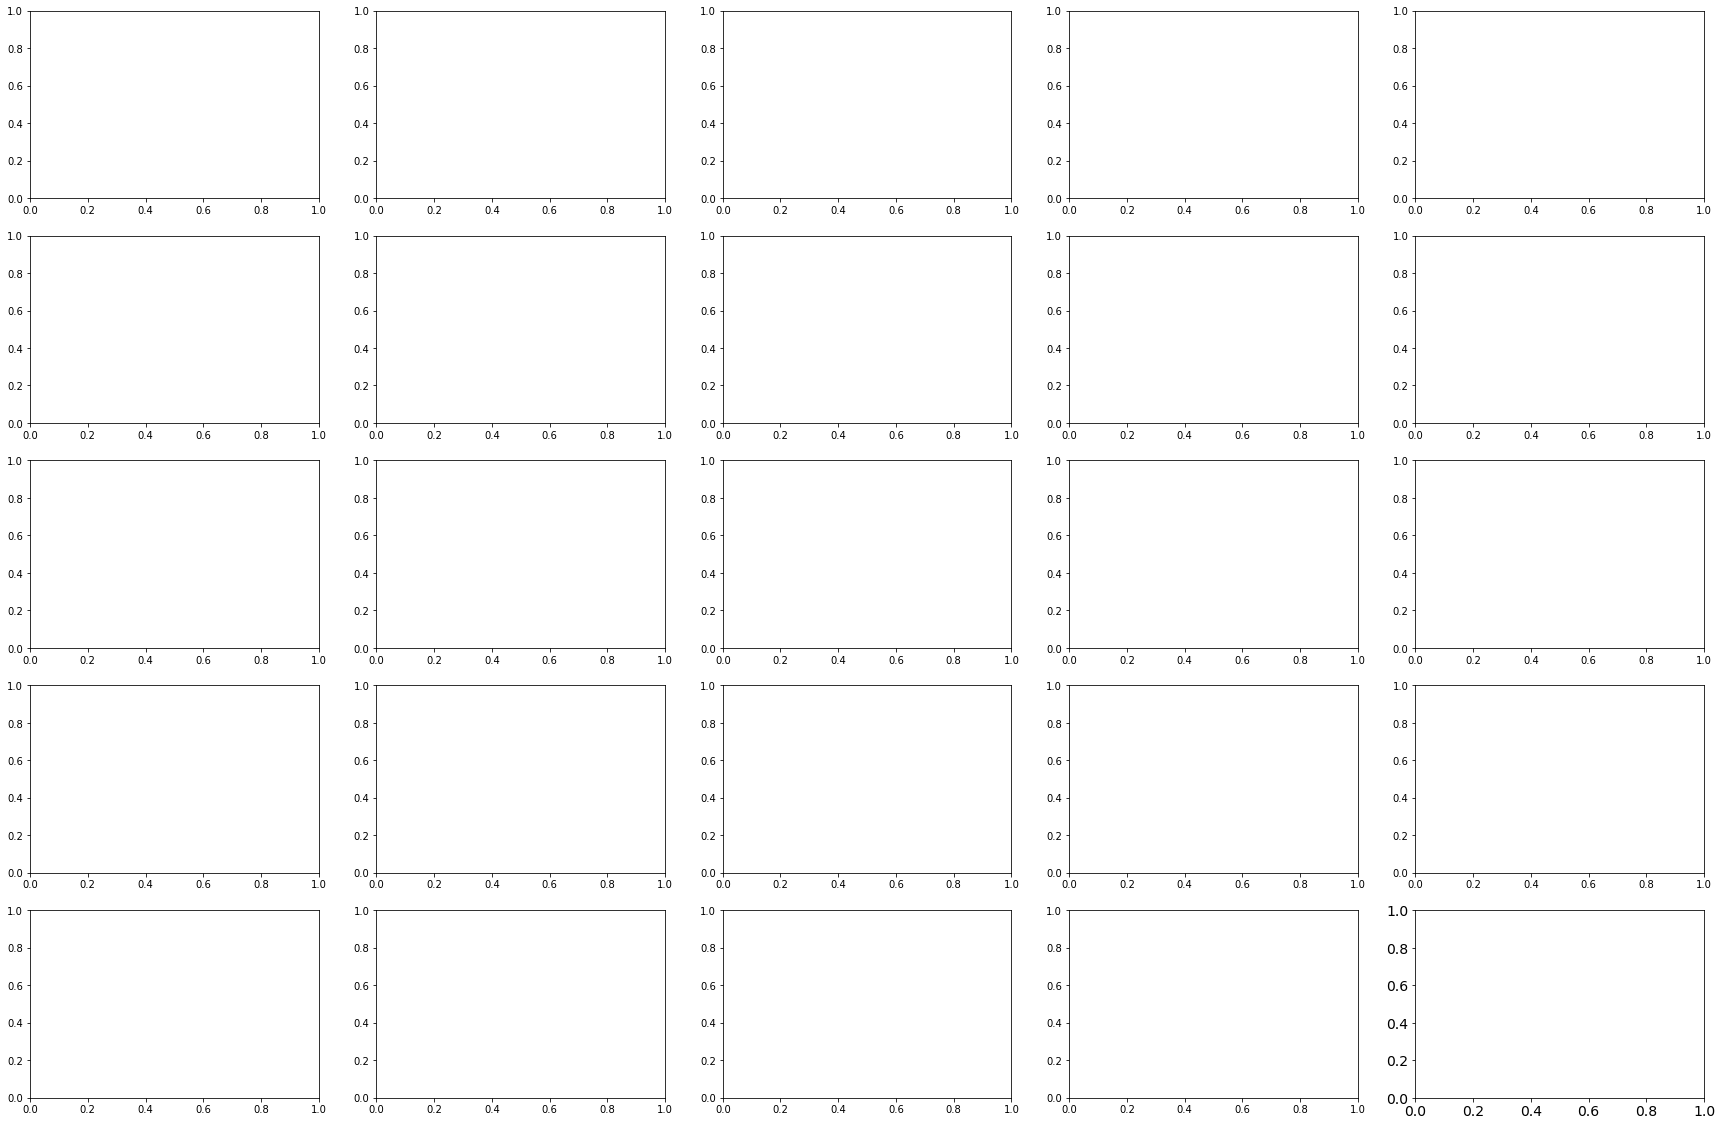

In [16]:
plot_scatter(fandom_list)

In [ ]:
fig, axs = plt.subplots(5,5, figsize=(30, 20))
axs = axs.ravel()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams.update({'axes.titlesize': 'large'})

for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path, fandom), sep = '\t')

#         axs[i].errorbar(x, y, yerr=asymmetric_error,fmt='o')
    axs[i].scatter(df['tag_novelty']*1000, np.log(df['Kudos']))
#         title = fandom.replace('_temporal_cos_toprev.tsv', '').replace('all_media_types', '')\
#         .replace("&_related_fandoms", '').replace("_", ' ').capitalize().replace('Dcu', 'DCU')
#         axs[i].set_title(title, fontsize = 20)
#         axs[i].set_xlim([min(x) -1, max(x) + 1])
#         axs[i].set_ylim([min(y) -0.2, max(y) + 0.2])
#         for tick in axs[i].xaxis.get_major_ticks():
#             tick.label.set_fontsize(16) 
#         for tick in axs[i].yaxis.get_major_ticks():
#             tick.label.set_fontsize(16)

#         fig.text(0.5, 0.06, 'Cosine distance', ha='center', va='center', fontsize=25)
#         fig.text(0.08, 0.5, 'Log Kudos', ha='center', va='center', rotation='vertical',fontsize=25)

#     plt.savefig('cos_log_kudos_toprev.pdf', format = 'pdf')


ValueError: arange: cannot compute length

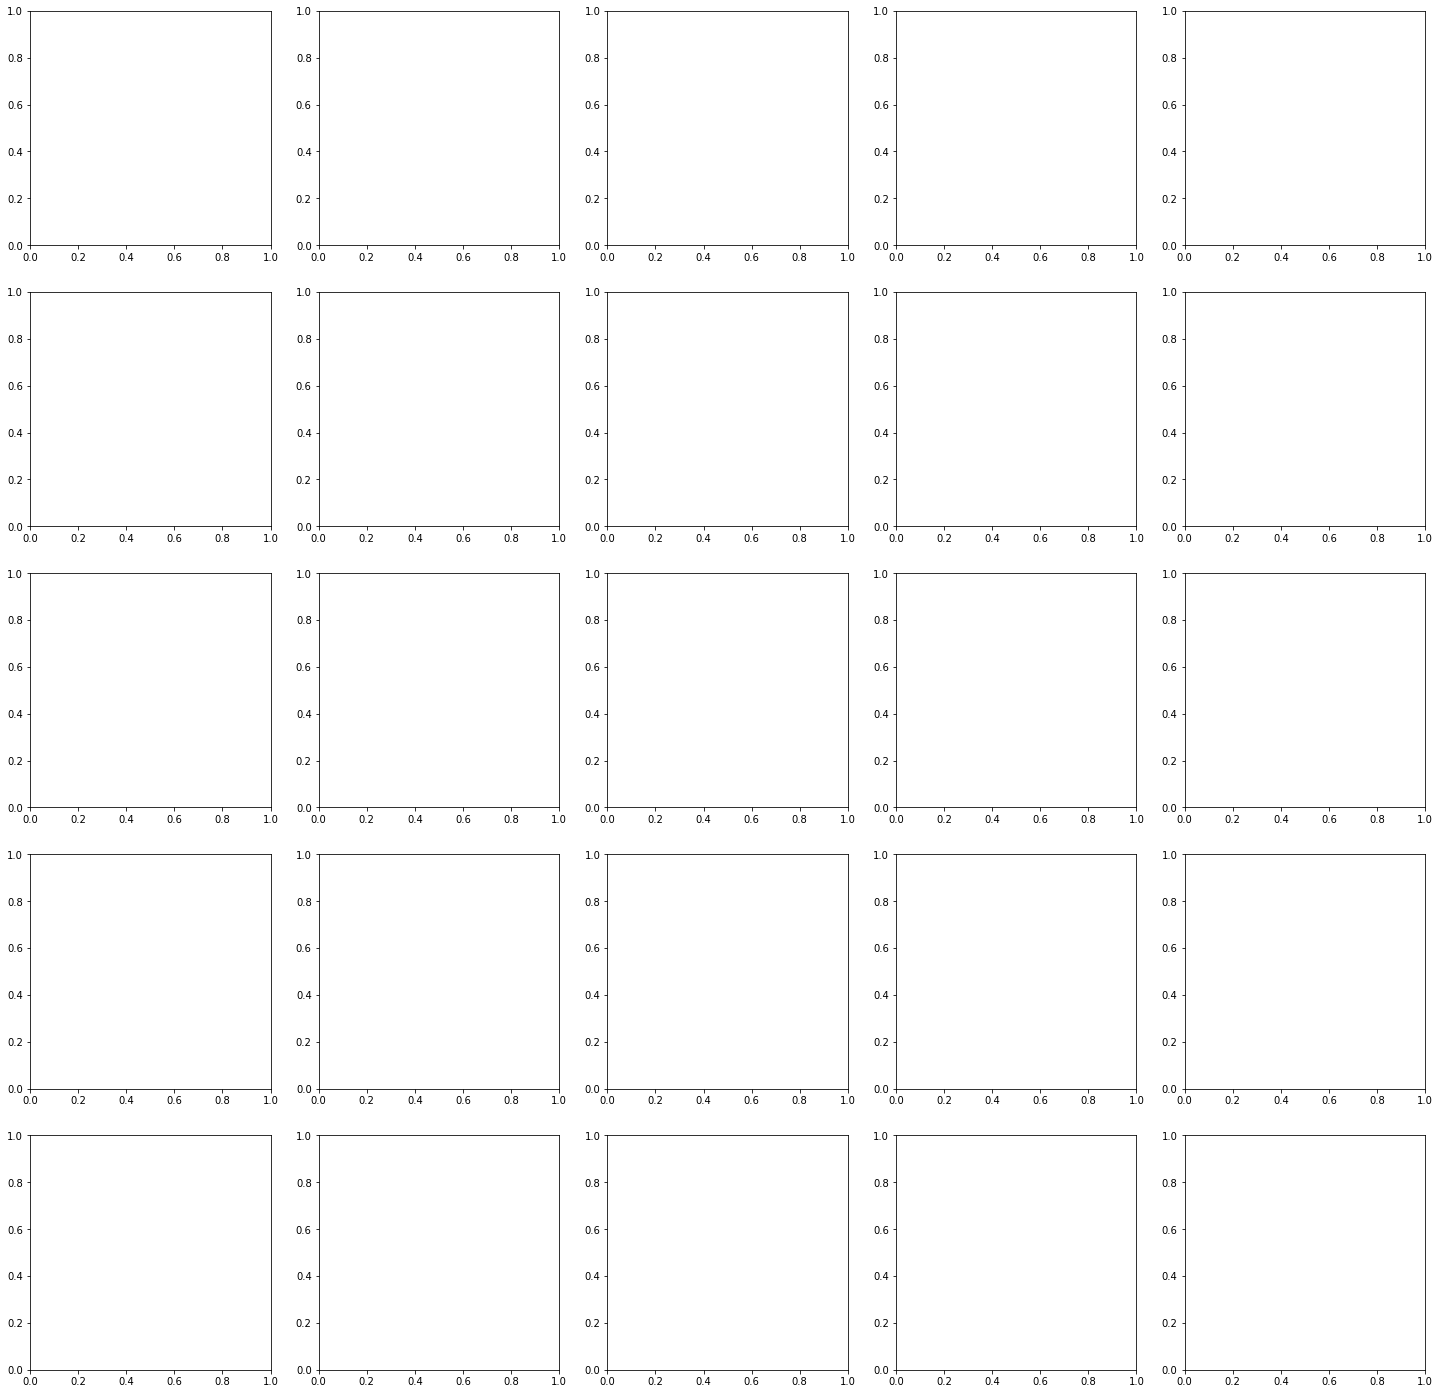

In [17]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.ravel()

for idx, fandom in enumerate(fandom_list):
    df = pd.read_csv(data_path + fandom, sep = '\t')
    df['Kudos'] = np.log(df['Kudos'])
    df = df.dropna(subset = ['Kudos'])

    df.tag_novelty = df.tag_novelty * 1000
    min_n = min(df.tag_novelty.tolist()) - 1
    max_n = max(df.tag_novelty.tolist()) + 1
    x = []
    for i in np.arange(min_n, max_n, 1):
        df_s = df[(df.tag_novelty >= i) & (df.tag_novelty < i+1)]
        x.append(df_s.Kudos.tolist())    
    axs[idx].boxplot(x)

#     axs[idx].set_title(fandom.replace('.pkl', ''), fontsize=25)
# fig.text(0.5, 0.1,'Time', ha='center', va='center', fontsize=25)
# fig.text(0.08, 0.5, 'Cosine distance', ha='center', va='center', rotation='vertical',fontsize=25)

# plt.savefig('temporal_cos_dist_box.png', format='png')
    

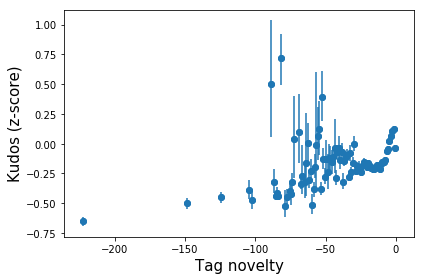

In [18]:
## Aggregate

def create_normed_dfs(df):
    
    # Normalize effects of authors by turning kudos into z-score corresponding to works from this author
    # Seems not useful b/c many authors only have 1 work
#     author_list = df.Author.drop_duplicates().tolist()
#     combined = []
#     for author in author_list:
#         df_a = df[df.Author == author]
#         if len(df_a) > 1:
#             df_a['Kudos'] = (df_a['Kudos'] - df_a['Kudos'].mean())/df_a['Kudos'].std(ddof=0)
#             combined.append(df_a)        
#     df = pd.concat(combined)
#     df = df[df.Kudos != 0]

# #     Normalize by creating hits/kudos 
#     df = df[df.Hits != 0]
#     df = df[df.Kudos != 0]
#     df['Kudos/Hits'] = df['Kudos'].astype(float)/df['Hits'].astype(float)
    
#     Normalize by log scale
#     df = df[df.Kudos != 0]
#     df['Kudos'] = np.log(df['Kudos'])
#     df = df[df.Hits != 0]
#     df['Hits'] = np.log(df['Hits'])
#     df['Kudos/Hits'] = df['Kudos'] - df['Hits']

#     # filter 0s
# #     df = df.fillna(0)"

#     # turn into z scores
    df['Kudos'] = df['Kudos'].astype(float)
    df['Kudos'] = (df['Kudos'] - df['Kudos'].mean())/df['Kudos'].std(ddof=0)

    return df

def create_dict(df, field, binsize):
    
    # Make bins
    df.tag_novelty = df.tag_novelty.astype(float)
    min_n = min(df.tag_novelty.tolist()) - 0.1
    max_n = max(df.tag_novelty.tolist()) + 0.1
    dic = {}
    for i in np.arange(min_n, max_n, binsize):
        df_s = df[(df.tag_novelty >= i) & (df.tag_novelty < i+binsize)]
#         if len(df_s) > 9:
#             print (min_cos, max_cos)
#             print(df_s[field].tolist())
        li = df_s[field].tolist()
        if len(li) > 5:
            dic[i] = bootstrap_resample(li)
    return dic

df_all = []
for i,fandom in enumerate(fandom_list):
    df = pd.read_csv(os.path.join(data_path,fandom), sep = '\t', error_bad_lines=False)
    df = df[['tag_novelty', 'Kudos']].dropna()
    df_all.append(create_normed_dfs(df))
df = pd.concat(df_all)

df.tag_novelty = df.tag_novelty * 1000
dic = create_dict(df, 'Kudos', 1)
x = sorted(dic.keys())
y = [dic[j][0] for j in x]

#     Make error bars
lower_error = [dic[j][0]-dic[j][1] for j in x]
upper_error = [dic[j][2]-dic[j][0] for j in x]
asymmetric_error = [lower_error, upper_error]


plt.errorbar(x, y, yerr=asymmetric_error,fmt='o')
plt.scatter(x, y)
plt.xlabel('Tag novelty',fontsize=15)
plt.ylabel('Kudos (z-score)',fontsize=15)

# #         title = fandom.replace('_temporal_cos_toprev.tsv', '').replace('all_media_types', '')\
# #         .replace("&_related_fandoms", '').replace("_", ' ').capitalize().replace('Dcu', 'DCU')
# #         axs[i].set_title(title, fontsize = 20)
# #         axs[i].set_xlim([min(x) -1, max(x) + 1])
# #         axs[i].set_ylim([min(y) -0.2, max(y) + 0.2])
#     for tick in axs[i].xaxis.get_major_ticks():
#         tick.label.set_fontsize(16) 
#     for tick in axs[i].yaxis.get_major_ticks():
#         tick.label.set_fontsize(16)

# #         break
#     # ax.set_yscale('log')

#     fig.text(0.5, 0.06, 'Cosine distance', ha='center', va='center', fontsize=25)
#     fig.text(0.08, 0.5, 'Log Kudos', ha='center', va='center', rotation='vertical',fontsize=25)

# #         except:
# #             pass
plt.tight_layout()
# plt.savefig('tag_novelty_kudos.pdf', format = 'pdf')

